In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime

In [58]:
start=datetime.datetime(2012,1,1)
end=datetime.datetime(2017,1,1)

In [59]:
tesla=web.DataReader("TSLA",'yahoo',start,end)
ford=web.DataReader("F",'yahoo',start,end)
gm=web.DataReader("GM",'yahoo',start,end)

In [60]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.299799
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.377232
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.167059
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.747812
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.685862


In [61]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.539530
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.654687
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.851135
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.932425
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.993394


In [109]:
tesla.tail()

,High,Low,Open,Close,Volume,Adj Close,Total Trade,MA50,MA200,returns,Cummulative Returns
Date,,,,,,,,,,,
2016-12-23,213.449997,207.710007,208.000000,213.339996,4670500,213.339996,9.714640e+08,194.3384,214.73525,0.023459,7.597578
2016-12-27,222.250000,214.419998,214.880005,219.529999,5915700,219.529999,1.271166e+09,194.6228,214.74640,0.029015,7.818020
2016-12-28,223.800003,217.199997,221.529999,219.740005,3782500,219.740005,8.379372e+08,195.1124,214.78270,0.000957,7.825499
2016-12-29,219.199997,214.119995,218.559998,214.679993,4045000,214.679993,8.840752e+08,195.5638,214.78550,-0.023027,7.645299
2016-12-30,217.500000,211.679993,216.300003,213.690002,4642600,213.690002,1.004194e+09,195.8950,214.75965,-0.004611,7.610043


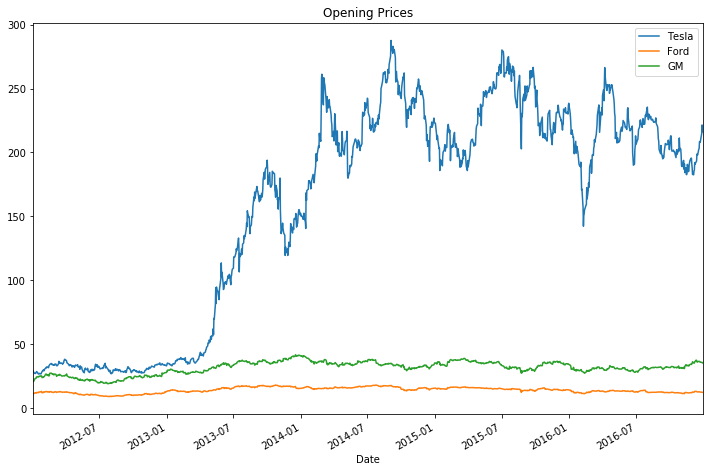

In [63]:
tesla['Open'].plot(label='Tesla',figsize=(12,8),title="Opening Prices")
ford['Open'].plot(label='Ford',figsize=(12,8),title="Opening Prices")
gm['Open'].plot(label='GM',figsize=(12,8),title="Opening Prices")
plt.legend()

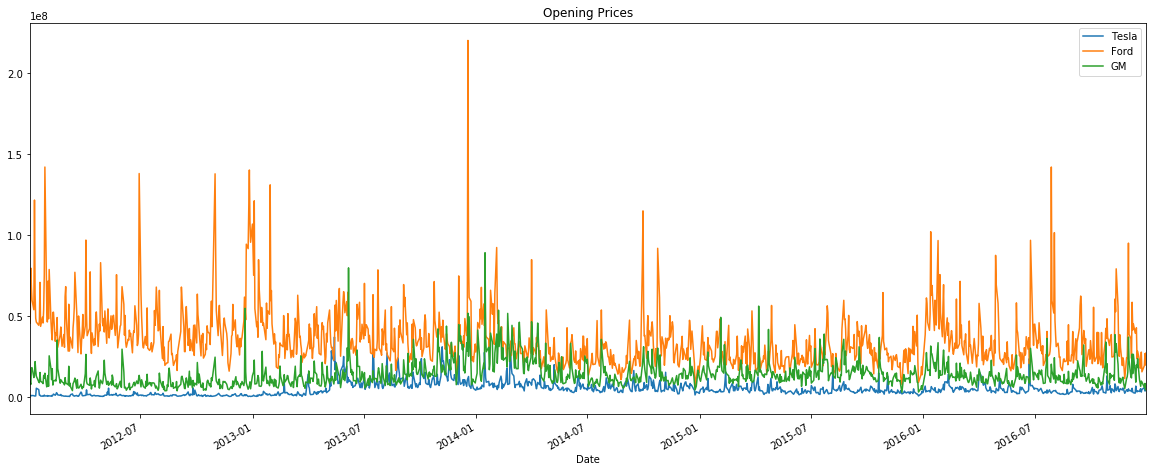

In [64]:
tesla['Volume'].plot(label='Tesla',figsize=(20,8),title="Opening Prices")
ford['Volume'].plot(label='Ford',figsize=(20,8),title="Opening Prices")
gm['Volume'].plot(label='GM',figsize=(20,8),title="Opening Prices")
plt.legend()

In [65]:
tesla["Total Trade"]=tesla['Open']*tesla['Volume']
ford["Total Trade"]=ford['Open']*ford['Volume']
gm["Total Trade"]=gm['Open']*gm['Volume']

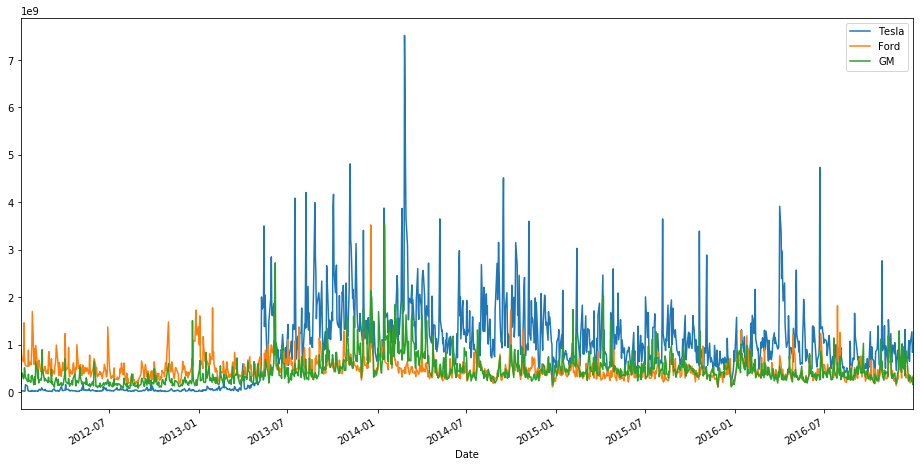

In [66]:
tesla["Total Trade"].plot(label='Tesla',figsize=(16,8))
ford["Total Trade"].plot(label='Ford',figsize=(16,8))
gm["Total Trade"].plot(label='GM',figsize=(16,8))
plt.legend()

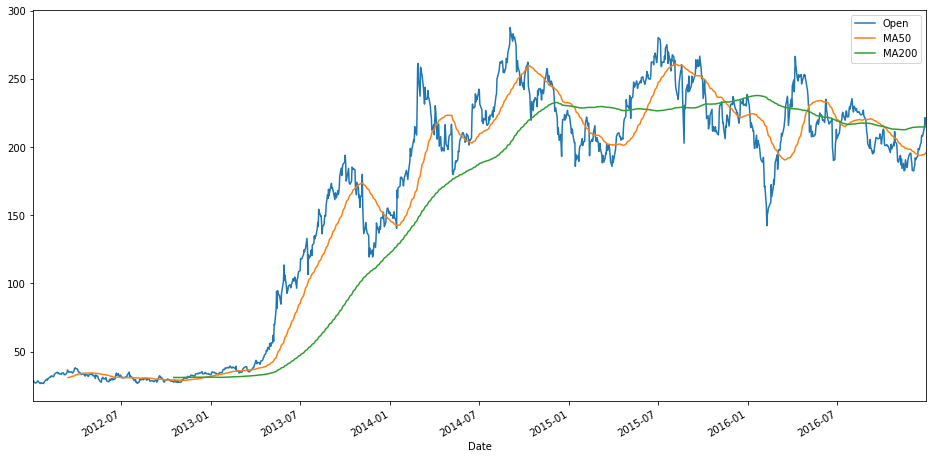

In [67]:
tesla["MA50"]=tesla["Open"].rolling(50).mean()
tesla["MA200"]=tesla["Open"].rolling(200).mean()
tesla[["Open","MA50","MA200"]].plot(figsize=(16,8))

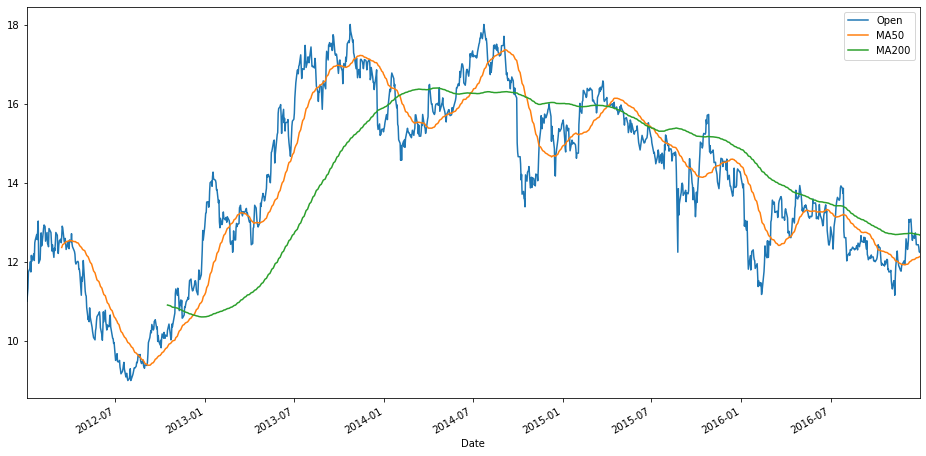

In [68]:
ford["MA50"]=ford["Open"].rolling(50).mean()
ford["MA200"]=ford["Open"].rolling(200).mean()
ford[["Open","MA50","MA200"]].plot(figsize=(16,8))

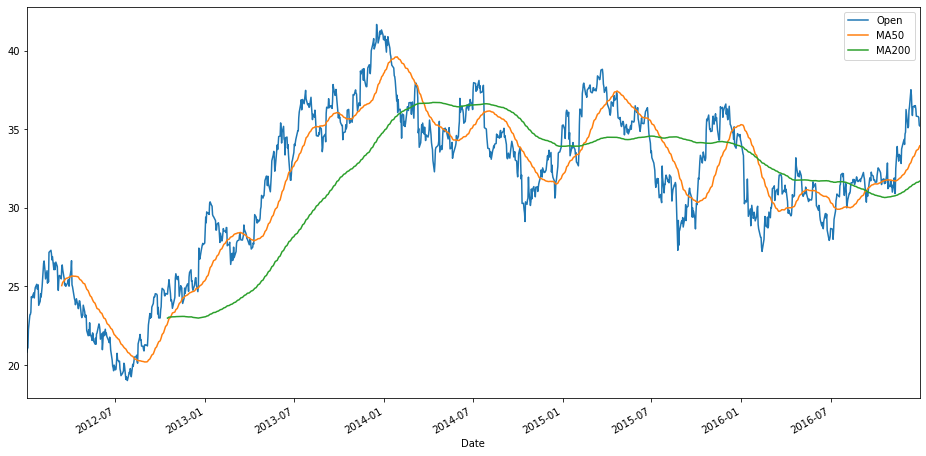

In [69]:
gm["MA50"]=gm["Open"].rolling(50).mean()
gm["MA200"]=gm["Open"].rolling(200).mean()
gm[["Open","MA50","MA200"]].plot(figsize=(16,8))

In [70]:
from pandas.plotting import scatter_matrix
car_comp=pd.concat([tesla["Open"],gm["Open"],ford["Open"]],axis=1)
car_comp.columns=["Tesla Open","GM Open","Ford Open"]
car_comp.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2012-01-03,28.940001,20.830000,11.00
2012-01-04,28.209999,21.049999,11.15
2012-01-05,27.760000,21.100000,11.33
2012-01-06,27.200001,22.260000,11.74
2012-01-09,27.000000,23.200001,11.83


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000256EAF1D548>,
      dtype=object)

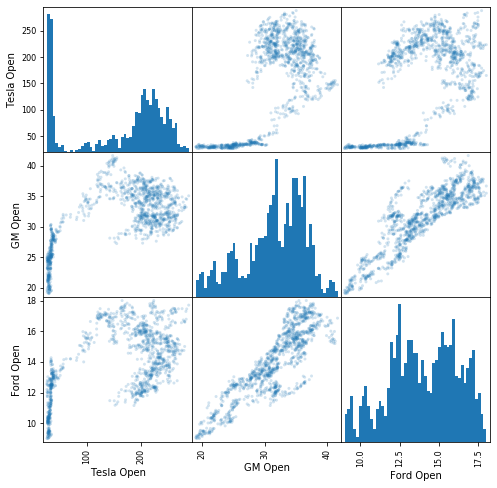

In [71]:
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={"bins":50})

In [72]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator,DayLocator,MONDAY

In [73]:
ford_reset=ford.loc['2014-01'].reset_index()
ford_reset["date-ax"]=ford_reset["Date"].apply(lambda date:date2num(date))
ford_reset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Total Trade,MA50,MA200,date-ax
0,2014-01-02,15.45,15.28,15.42,15.44,31528500.0,10.937551,4.861695e+08,16.7086,15.91185,735235.0
1,2014-01-03,15.64,15.30,15.52,15.51,46122300.0,10.987138,7.158181e+08,16.6680,15.92335,735236.0
2,2014-01-06,15.76,15.52,15.72,15.58,42657600.0,11.036727,6.705775e+08,16.6292,15.93570,735239.0
3,2014-01-07,15.74,15.35,15.73,15.38,54476300.0,10.895046,8.569122e+08,16.5836,15.94815,735240.0
4,2014-01-08,15.71,15.51,15.60,15.54,48448300.0,11.008392,7.557935e+08,16.5388,15.95960,735241.0


In [74]:
list_of_cols=["date-ax","Open","High","Low","Close"]
ford_values=[tuple(vals) for vals in ford_reset[list_of_cols].values]

In [75]:
tesla_reset=tesla.loc['2014-01'].reset_index()
tesla_reset["date-ax"]=tesla_reset["Date"].apply(lambda date:date2num(date))
tesla_reset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Total Trade,MA50,MA200,date-ax
0,2014-01-02,152.479996,146.550003,149.800003,150.100006,6188400,150.100006,9.270223e+08,145.6950,122.64935,735235.0
1,2014-01-03,152.190002,148.600006,150.000000,149.559998,4695000,149.559998,7.042500e+08,145.2850,123.22305,735236.0
2,2014-01-06,150.399994,145.240005,150.000000,147.000000,5361100,147.000000,8.041650e+08,144.9068,123.79330,735239.0
3,2014-01-07,150.399994,145.250000,147.619995,149.360001,5034100,149.360001,7.431338e+08,144.5592,124.35040,735240.0
4,2014-01-08,153.699997,148.759995,148.850006,151.279999,6163200,151.279999,9.173924e+08,144.0520,124.90915,735241.0


In [76]:
list_of_cols=["date-ax","Open","High","Low","Close"]
tesla_values=[tuple(vals) for vals in tesla_reset[list_of_cols].values]

In [77]:
gm_reset=gm.loc['2014-01'].reset_index()
gm_reset["date-ax"]=gm_reset["Date"].apply(lambda date:date2num(date))
gm_reset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Total Trade,MA50,MA200,date-ax
0,2014-01-02,41.060001,40.340000,40.680000,40.950001,14763300.0,31.709108,6.005710e+08,38.6156,34.90800,735235.0
1,2014-01-03,40.950001,39.000000,40.919998,39.570000,41426900.0,30.640522,1.695189e+09,38.7216,34.97135,735236.0
2,2014-01-06,40.590000,39.639999,39.900002,40.400002,25063500.0,31.283220,1.000034e+09,38.8120,35.02630,735239.0
3,2014-01-07,40.939999,40.099998,40.700001,40.200001,14156900.0,31.128359,5.761858e+08,38.9162,35.08670,735240.0
4,2014-01-08,40.840000,40.200001,40.330002,40.419998,11342400.0,31.298708,4.574390e+08,39.0094,35.14640,735241.0


In [78]:
list_of_cols=["date-ax","Open","High","Low","Close"]
gm_values=[tuple(vals) for vals in gm_reset[list_of_cols].values]

In [79]:
mondays=WeekdayLocator(MONDAY)  #major ticks on monday
alldays=DayLocator()            #minor ticks on monday
weekFormatter=DateFormatter("%b %d")   #eg Jan 12
dayFormatter=DateFormatter("%d")

([<matplotlib.lines.Line2D at 0x256d096a0c8>,
  <matplotlib.patches.Rectangle at 0x256eb8cc488>])

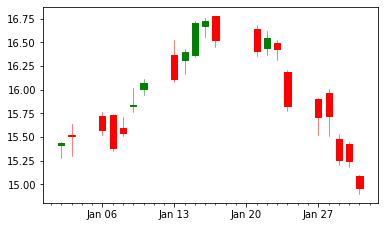

In [80]:
fig,ax=plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(ax,ford_values,width=0.6,colorup='g',colordown='r')

([<matplotlib.lines.Line2D at 0x256eb975a08>,
  <matplotlib.patches.Rectangle at 0x256eba49cc8>])

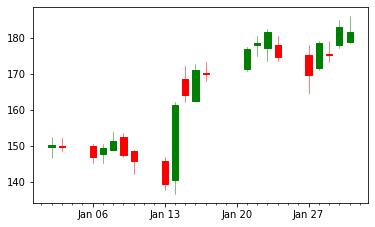

In [81]:
fig,ax=plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(ax,tesla_values,width=0.6,colorup='g',colordown='r')

([<matplotlib.lines.Line2D at 0x256ebaf11c8>,
  <matplotlib.patches.Rectangle at 0x256ebb63608>])

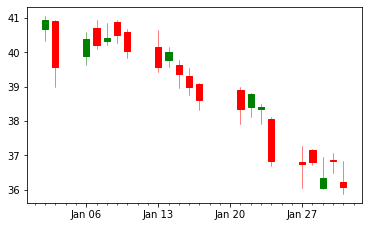

In [82]:
fig,ax=plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(ax,gm_values,width=0.6,colorup='g',colordown='r')

In [83]:
tesla["returns"]=(tesla["Close"]/tesla["Close"].shift(1))-1
tesla["returns"]=tesla["Close"].pct_change(1)
tesla["returns"].head()  #-ve for money loss

Date
2012-01-03         NaN
2012-01-04   -0.013177
2012-01-05   -0.021292
2012-01-06   -0.007743
2012-01-09    0.012635
Name: returns, dtype: float64

In [84]:
ford["returns"]=(ford["Close"]/ford["Close"].shift(1))-1
ford["returns"]=ford["Close"].pct_change(1)
ford["returns"].head()   #-ve for money loss

Date
2012-01-03         NaN
2012-01-04    0.015274
2012-01-05    0.025664
2012-01-06    0.010354
2012-01-09    0.007686
Name: returns, dtype: float64

In [85]:
gm["returns"]=(gm["Close"]/gm["Close"].shift(1))-1
gm["returns"]=gm["Close"].pct_change(1)
gm["returns"].head()     #-ve for money loss

Date
2012-01-03         NaN
2012-01-04    0.004751
2012-01-05    0.048227
2012-01-06    0.033829
2012-01-09   -0.003490
Name: returns, dtype: float64

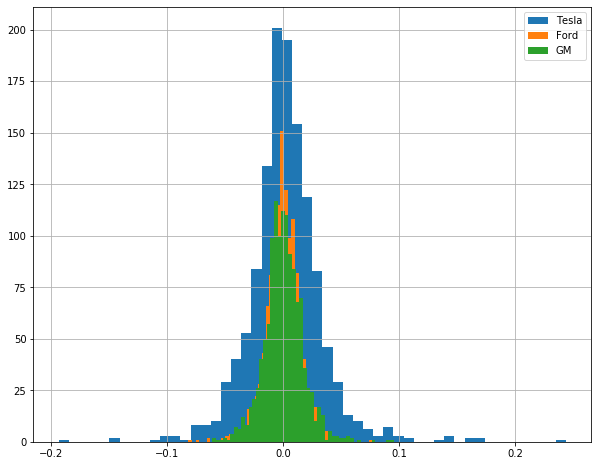

In [86]:
tesla["returns"].hist(bins=50,label="Tesla",figsize=(10,8))
ford["returns"].hist(bins=50,label="Ford",figsize=(10,8))
gm["returns"].hist(bins=50,label="GM",figsize=(10,8))
plt.legend()

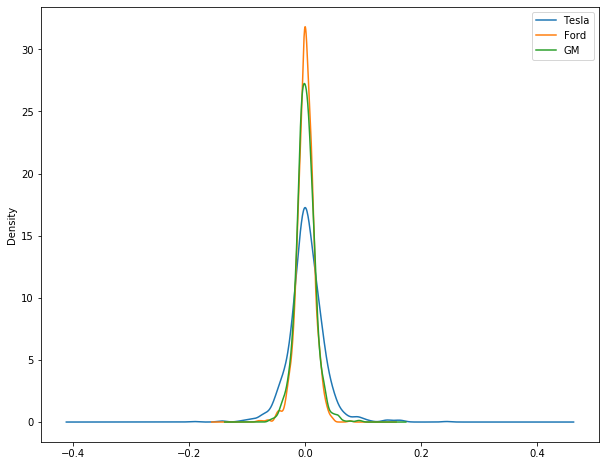

In [87]:
tesla["returns"].plot(kind='kde',label="Tesla",figsize=(10,8))
ford["returns"].plot(kind='kde',label="Ford",figsize=(10,8))
gm["returns"].plot(kind='kde',label="GM",figsize=(10,8))
plt.legend()

In [88]:
box_df=pd.concat([tesla['returns'],ford['returns'],gm['returns']],axis=1)
box_df.columns=['Tesla Returns','Ford Returns','GM Returns']

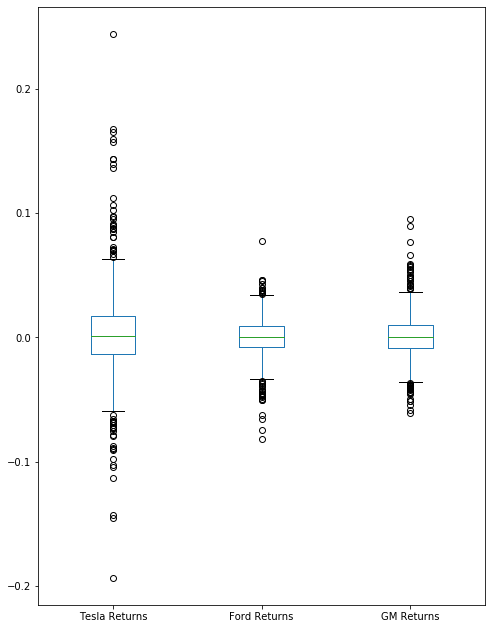

In [89]:
box_df.plot(kind='box',figsize=(8,11))

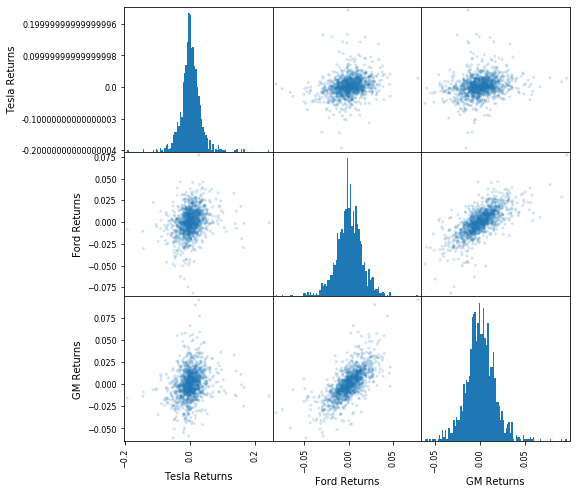

In [90]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':100});

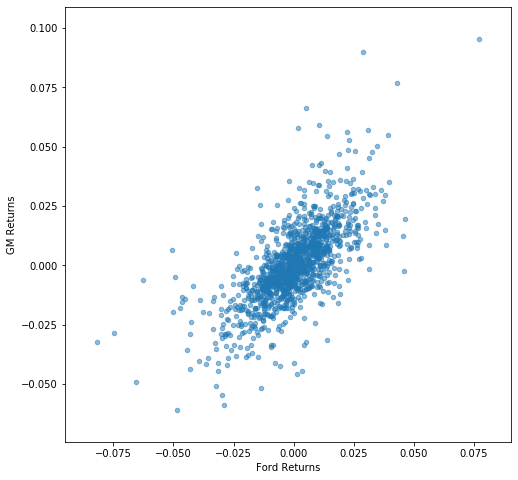

In [91]:
box_df.plot(kind='scatter',x="Ford Returns",y="GM Returns",alpha=0.5,figsize=(8,8))

In [92]:
tesla["Cummulative Returns"]=(1+tesla["returns"]).cumprod()
ford["Cummulative Returns"]=(1+ford["returns"]).cumprod()
gm["Cummulative Returns"]=(1+gm["returns"]).cumprod()

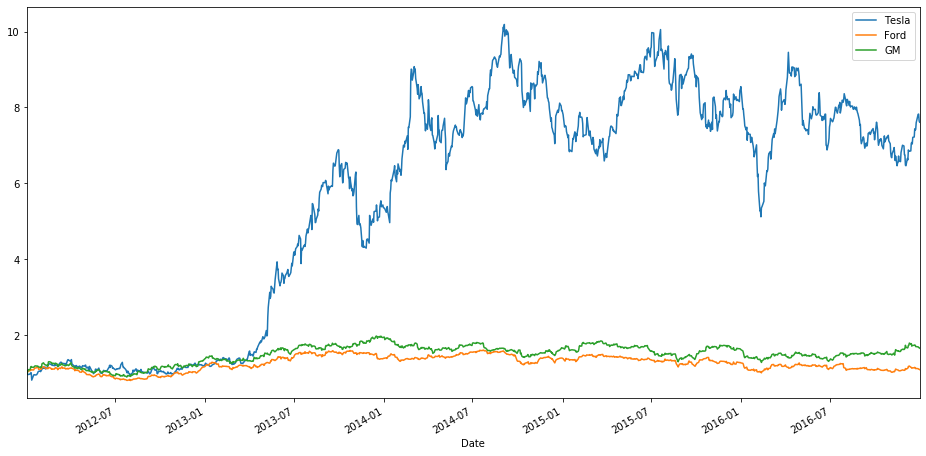

In [93]:
tesla["Cummulative Returns"].plot(label="Tesla",figsize=(16,8))
ford["Cummulative Returns"].plot(label="Ford",figsize=(16,8))
gm["Cummulative Returns"].plot(label="GM",figsize=(16,8))
plt.legend()

In [94]:
#Predicting the stock using the RNN model

In [95]:
#Tesla
train = tesla.iloc[:, 1:2].values

In [96]:
train

array([[ 27.64999962],
       [ 27.5       ],
       [ 26.85000038],
       ...,
       [217.19999695],
       [214.11999512],
       [211.67999268]])

In [97]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train = sc.fit_transform(train)

In [98]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(train[i-60:i, 0])
    y_train.append(train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [99]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [100]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [101]:
# Initialising the RNN
regressor = Sequential()

In [102]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [103]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [104]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [105]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [106]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [107]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [108]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 5, batch_size = 32)

Epoch 1/5
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0583
Epoch 2/5
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0089
Epoch 3/5
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0081A: 0s - loss: 0.00
Epoch 4/5
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0083
Epoch 5/5
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0074


In [125]:
start=datetime.datetime(2017,1,1)
end=datetime.datetime(2017,2,1)
test_dataset=web.DataReader("TSLA",'yahoo',start,end)
test = test_tesla_dataset.iloc[:, 1:2].values

In [126]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((tesla['Open'], test_dataset['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_dataset) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

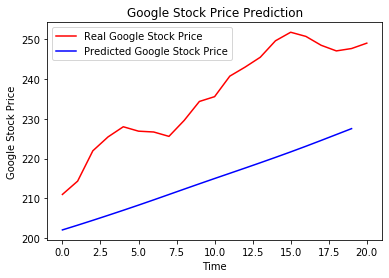

In [127]:
# Visualising the results
plt.plot(test, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [128]:
#To check for Ford And Gm change tesla to ford or gm